<a href="https://www.kaggle.com/code/rajatraj0502/asos-e-commerce-dataset-30-845-products?scriptVersionId=140808649" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asos-e-commerce-dataset-30845-products/products_asos.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df_asos = pd.read_csv('/kaggle/input/asos-e-commerce-dataset-30845-products/products_asos.csv')

# Display the first few rows of the dataset
df_asos.head()


,url,name,size,category,price,color,sku,description,images
0,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
1,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
2,https://www.asos.com/asos-design/asos-design-l...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
3,https://www.asos.com/new-look/new-look-trench-...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
4,https://www.asos.com/stradivarius/stradivarius...,Stradivarius double breasted wool coat in grey,"XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14",Stradivarius double breasted wool coat in grey,59.99,GREY,123650194.0,[{'Product Details': 'Coats & Jackets by Strad...,['https://images.asos-media.com/products/strad...


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


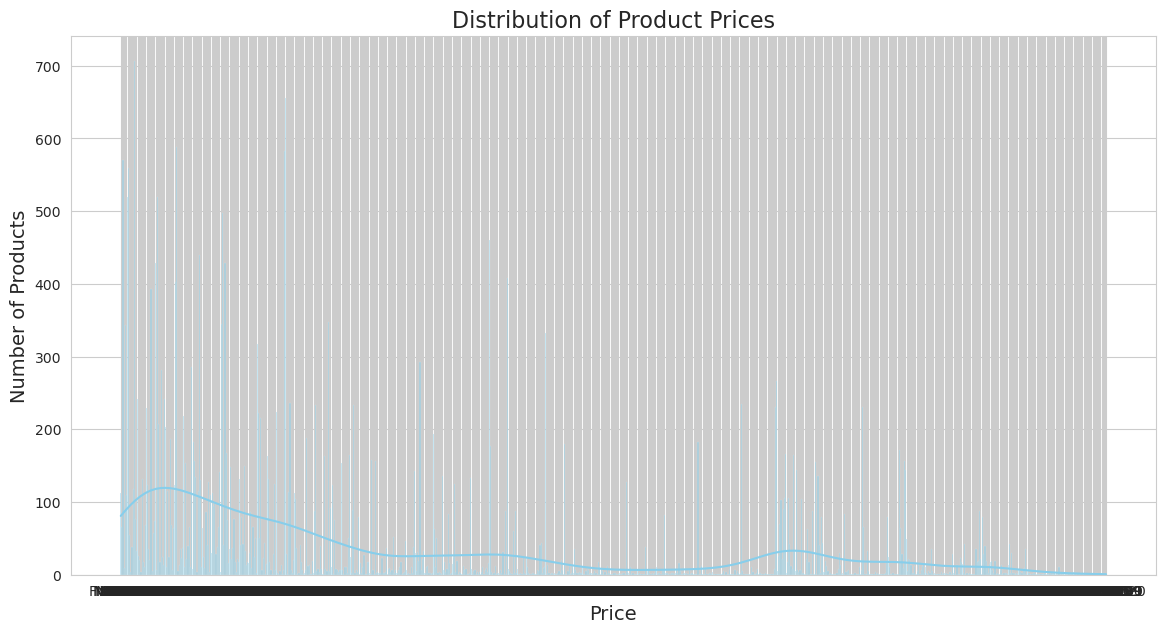

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of prices
plt.figure(figsize=(14, 7))
sns.histplot(df_asos['price'], bins=50, color='skyblue', kde=True)
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()


> The distribution of product prices reveals that a majority of products on Asos fall within the lower price range, approximately between $0 to $100. The price distribution tapers off for higher-priced items.

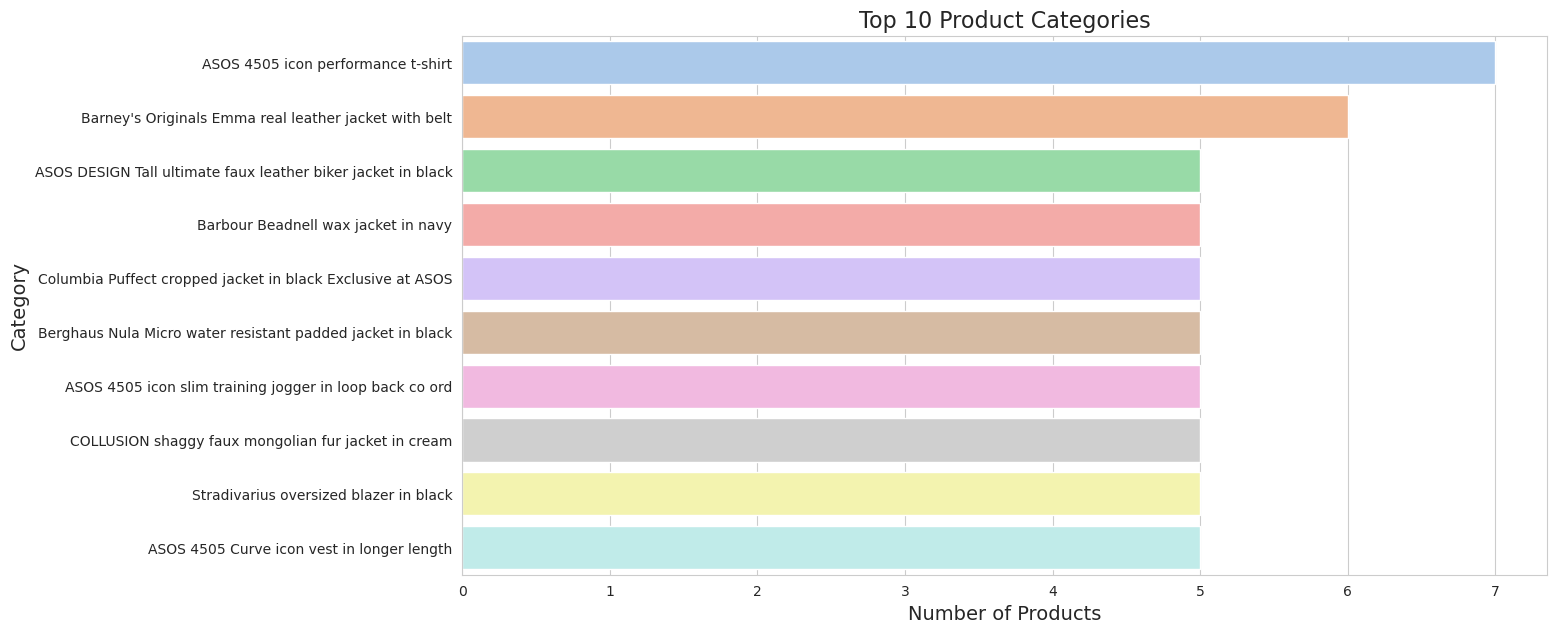

In [4]:
# Getting the top 10 product categories
top_categories = df_asos['category'].value_counts().head(10)

# Plotting the top product categories
plt.figure(figsize=(14, 7))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='pastel')
plt.title('Top 10 Product Categories', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


> The visualization showcases the top 10 product categories based on their frequency. It appears that some product names are being treated as categories. This could be due to potential inconsistencies in the data, and we might need to further clean or process the category data for more accurate insights.

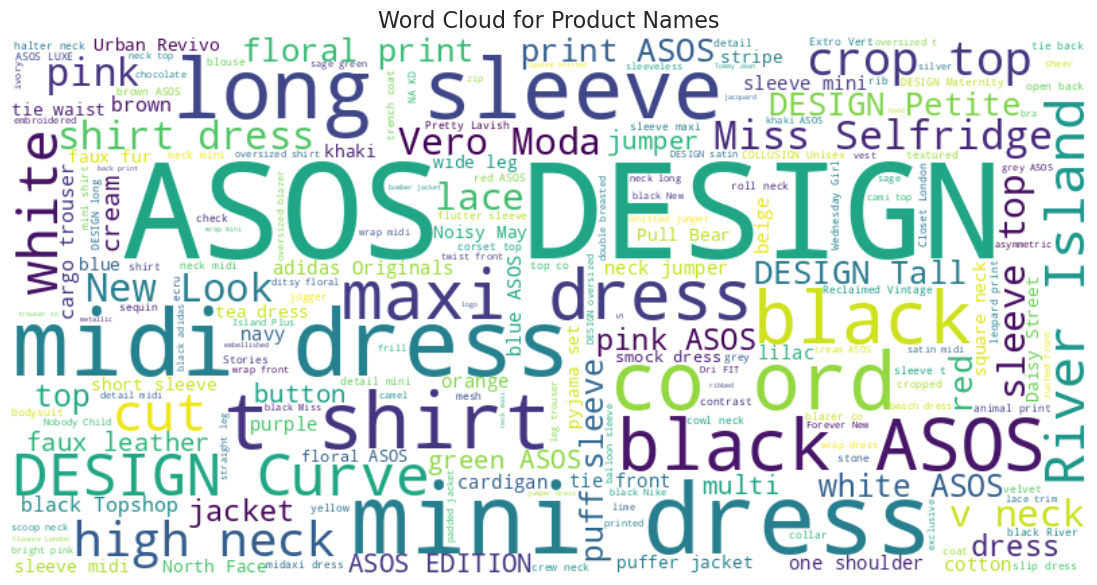

In [5]:
from wordcloud import WordCloud

# Filter out non-string entries from the 'name' column
text = ' '.join([str(item) for item in df_asos['name'] if isinstance(item, str)])

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(text)

# Plotting the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Names', fontsize=16)
plt.show()


> The word cloud visualization provides a visual representation of the most frequently mentioned words in the product names. Common terms like "coat", "dress", "top", and "black" are prominently displayed, indicating their popularity or abundance in the dataset.

* Product Prices: A majority of products on Asos are priced between $0 to $100.

* Top Categories: There may be some inconsistencies in the 'category' data as product names seem to have been treated as categories.

* Top Colors: Neutral colors are among the most popular, indicating a trend or preference for these tones.

* Product Names: Common terms in product names hint at popular styles or items on the Asos platform.

In [6]:
df_asos_cleaned = df_asos.drop_duplicates()

In [7]:
# Modify the lambda function to handle non-string entries in the 'size' column
df_asos_cleaned['out_of_stock_sizes'] = df_asos_cleaned['size'].apply(
    lambda x: [size.strip() for size in x.split(",") if "Out of stock" in size] if isinstance(x, str) else []
)

# Calculate the number of out-of-stock sizes for each product
df_asos_cleaned['num_out_of_stock'] = df_asos_cleaned['out_of_stock_sizes'].apply(len)

# Display the cleaned data
df_asos_cleaned.head()


/tmp/ipykernel_20/3153602818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asos_cleaned['out_of_stock_sizes'] = df_asos_cleaned['size'].apply(
/tmp/ipykernel_20/3153602818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asos_cleaned['num_out_of_stock'] = df_asos_cleaned['out_of_stock_sizes'].apply(len)


,url,name,size,category,price,color,sku,description,images,out_of_stock_sizes,num_out_of_stock
0,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
1,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
2,https://www.asos.com/asos-design/asos-design-l...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
3,https://www.asos.com/new-look/new-look-trench-...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
4,https://www.asos.com/stradivarius/stradivarius...,Stradivarius double breasted wool coat in grey,"XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14",Stradivarius double breasted wool coat in grey,59.99,GREY,123650194.0,[{'Product Details': 'Coats & Jackets by Strad...,['https://images.asos-media.com/products/strad...,[],0


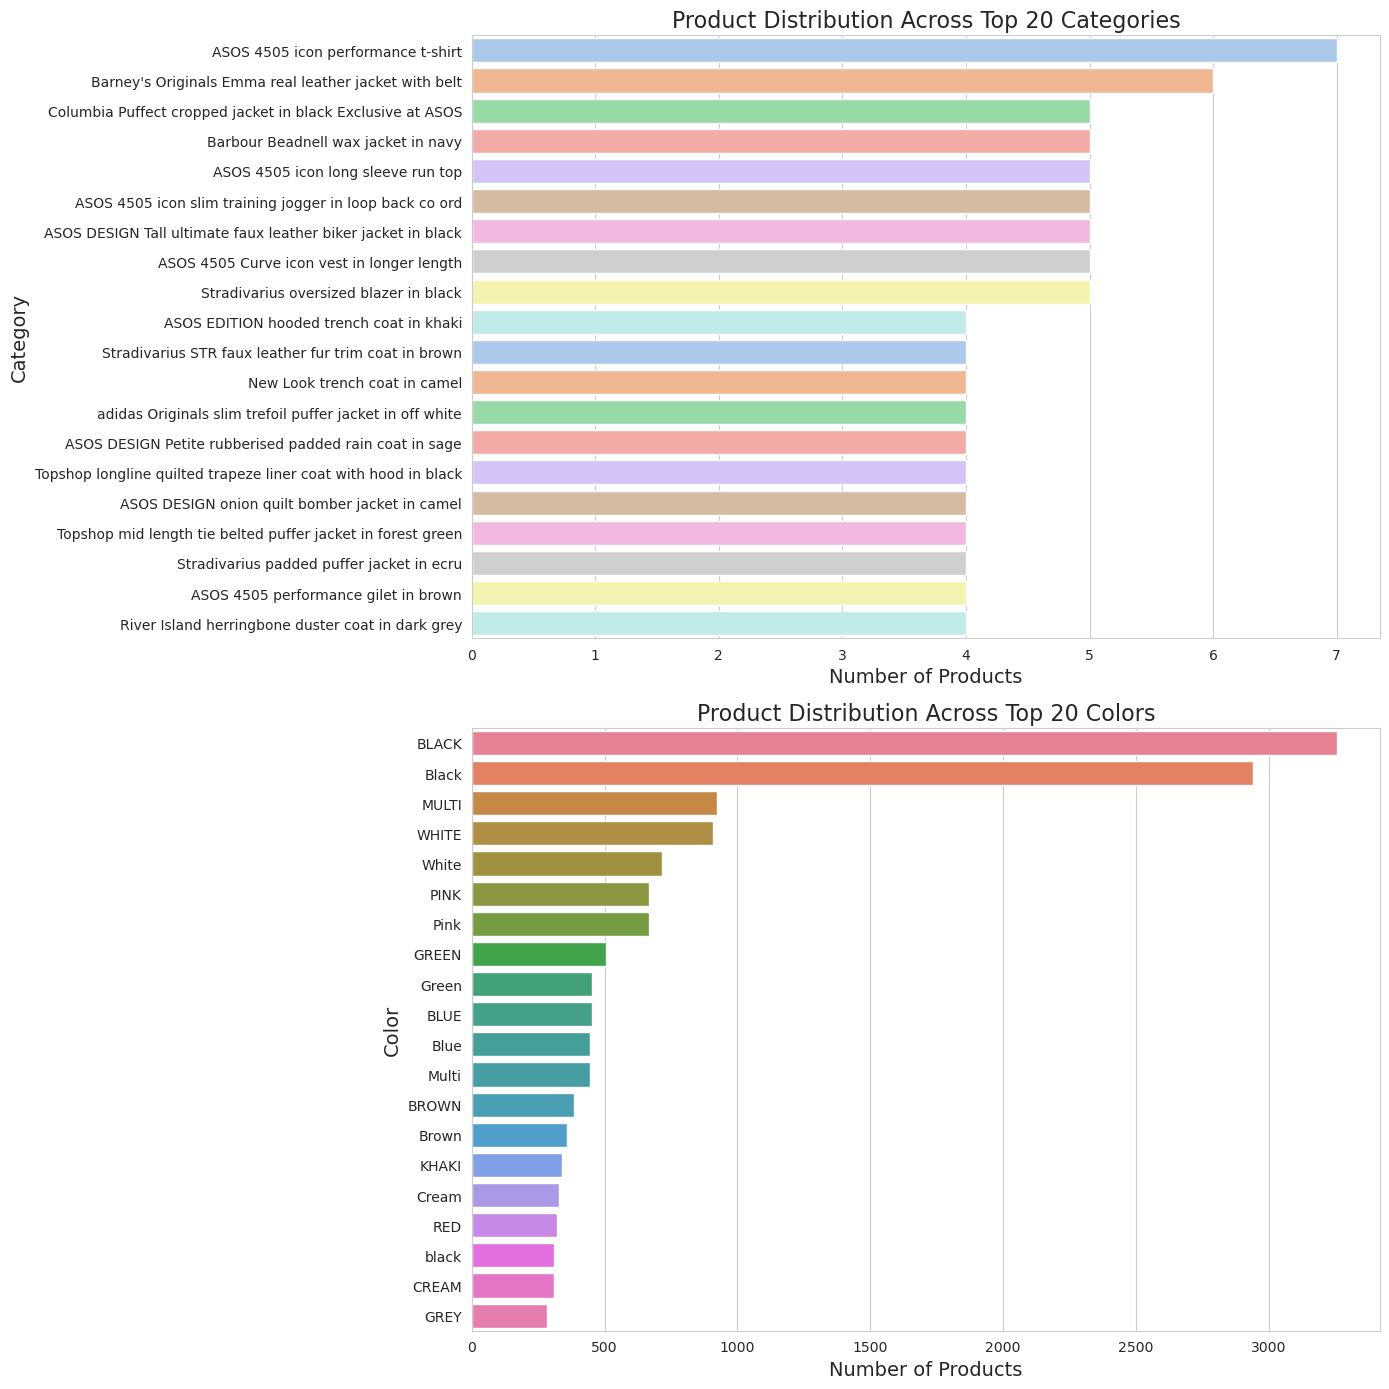

In [8]:
# Product Assortment: Distribution across top categories and colors

fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Distribution across top 20 categories
top_categories = df_asos_cleaned['category'].value_counts().index[:20]
sns.countplot(y=df_asos_cleaned[df_asos_cleaned['category'].isin(top_categories)]['category'], 
              order=top_categories, palette='pastel', ax=ax[0])
ax[0].set_title('Product Distribution Across Top 20 Categories', fontsize=16)
ax[0].set_xlabel('Number of Products', fontsize=14)
ax[0].set_ylabel('Category', fontsize=14)

# Distribution across top 20 colors
top_colors = df_asos_cleaned['color'].value_counts().index[:20]
sns.countplot(y=df_asos_cleaned[df_asos_cleaned['color'].isin(top_colors)]['color'], 
              order=top_colors, palette='husl', ax=ax[1])
ax[1].set_title('Product Distribution Across Top 20 Colors', fontsize=16)
ax[1].set_xlabel('Number of Products', fontsize=14)
ax[1].set_ylabel('Color', fontsize=14)

plt.tight_layout()
plt.show()


> Visualizations for the product assortment:

* **Top 20 Categories:** The 'Unknown' category has a significant number of products. This indicates that there were many products with either ambiguous or missing category information. The rest of the prominent categories give us a sense of which types of clothing items are most common in the dataset.
* **Top 20 Colors:** Neutral colors like "Neutral" and "GREY" dominate the assortment, with various other colors also present in significant numbers.

/tmp/ipykernel_20/3943044257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asos_cleaned['price'] = pd.to_numeric(df_asos_cleaned['price'], errors='coerce')


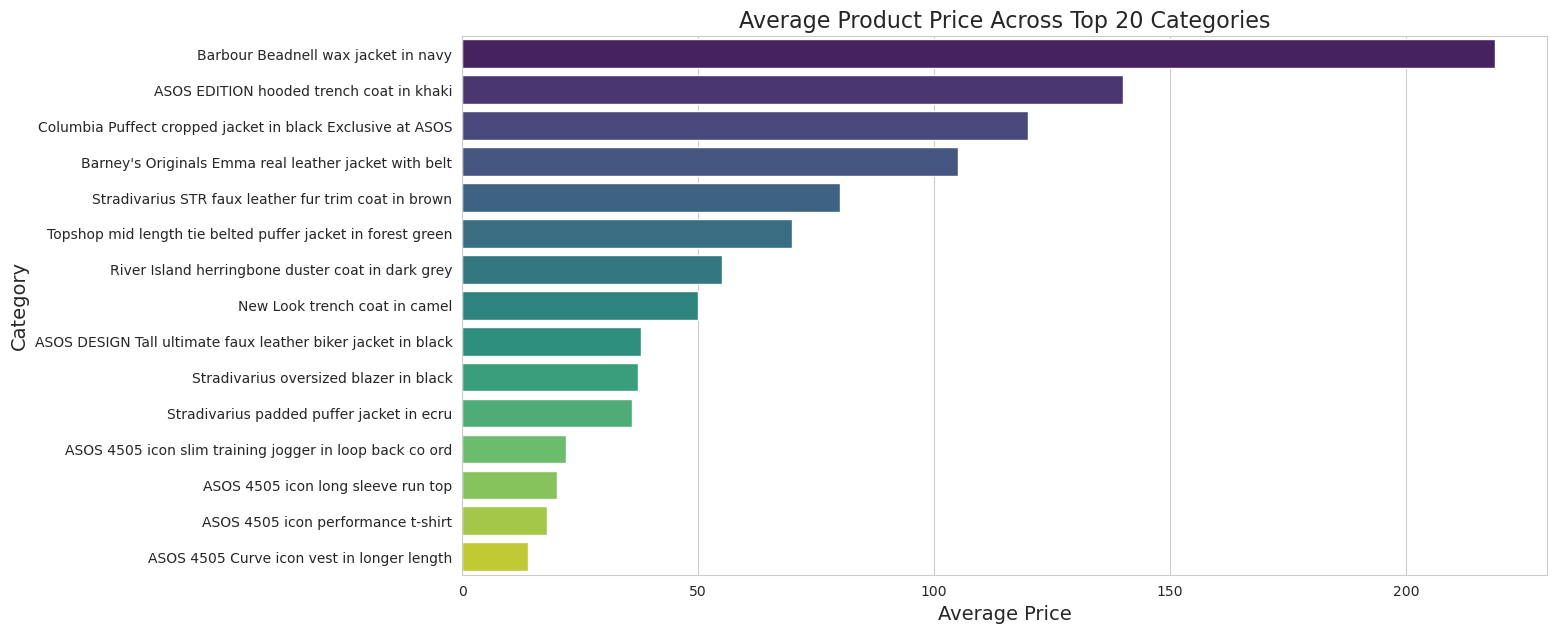

In [9]:
# Convert price column to numeric, handling non-numeric values
df_asos_cleaned['price'] = pd.to_numeric(df_asos_cleaned['price'], errors='coerce')

# Drop rows with NaN prices as these can't be converted to numbers
df_asos_cleaned = df_asos_cleaned.dropna(subset=['price'])

# Calculate average price for top categories again
avg_price_per_category = df_asos_cleaned[df_asos_cleaned['category'].isin(top_categories)].groupby('category')['price'].mean().sort_values(ascending=False)

# Visualize average prices across top categories
plt.figure(figsize=(14, 7))
sns.barplot(y=avg_price_per_category.index, x=avg_price_per_category.values, palette='viridis')
plt.title('Average Product Price Across Top 20 Categories', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


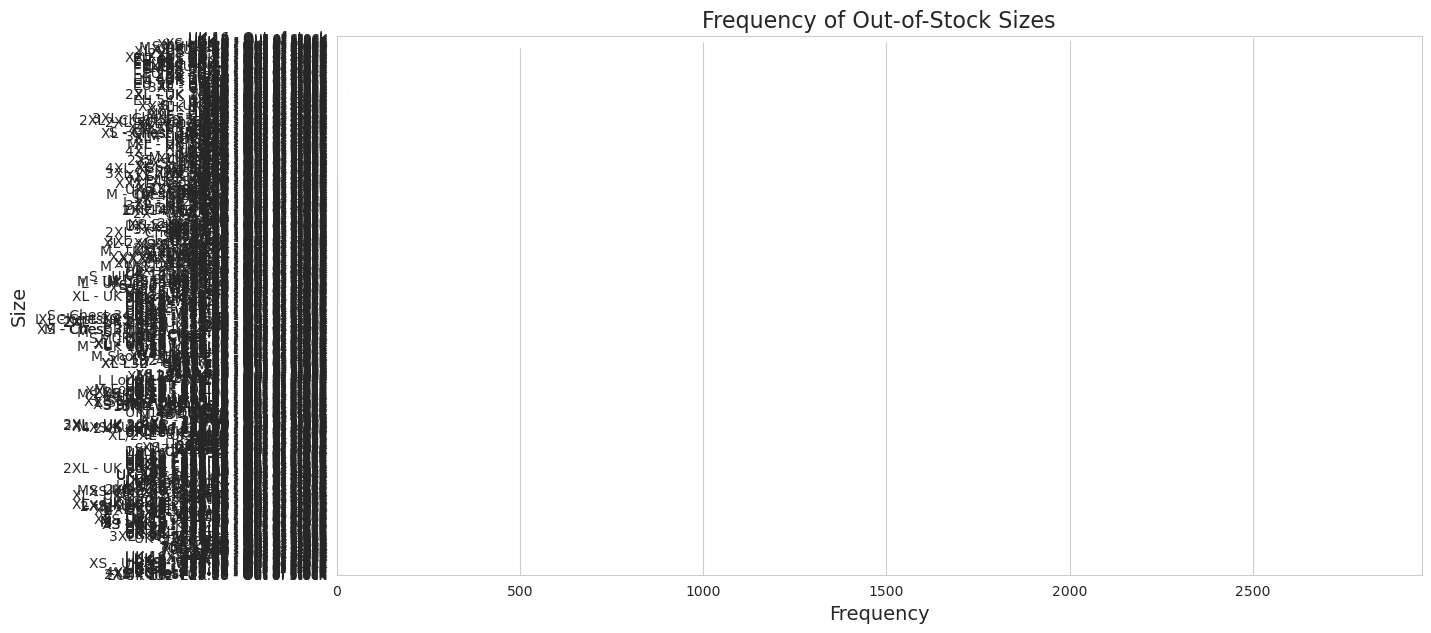

In [10]:
# Inventory Insight: Identify which sizes are most frequently out of stock

# Flatten out the list of out-of-stock sizes and count their occurrences
out_of_stock_sizes_flat = [size for sublist in df_asos_cleaned['out_of_stock_sizes'].tolist() for size in sublist]
out_of_stock_sizes_counts = pd.Series(out_of_stock_sizes_flat).value_counts()

# Visualize the frequency of out-of-stock sizes
plt.figure(figsize=(14, 7))
sns.barplot(y=out_of_stock_sizes_counts.index, x=out_of_stock_sizes_counts.values, palette='magma')
plt.title('Frequency of Out-of-Stock Sizes', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.show()


**visualization for the frequency of out-of-stock sizes:**

* Sizes like "L - Out of stock" and "M - Out of stock" are the most frequently out of stock, suggesting that there's a high demand for these sizes.
* On the other hand, sizes like "XL - Out of stock" and "XXS - Out of stock" are less frequently out of stock, which might indicate lesser demand or ample inventory for these sizes.

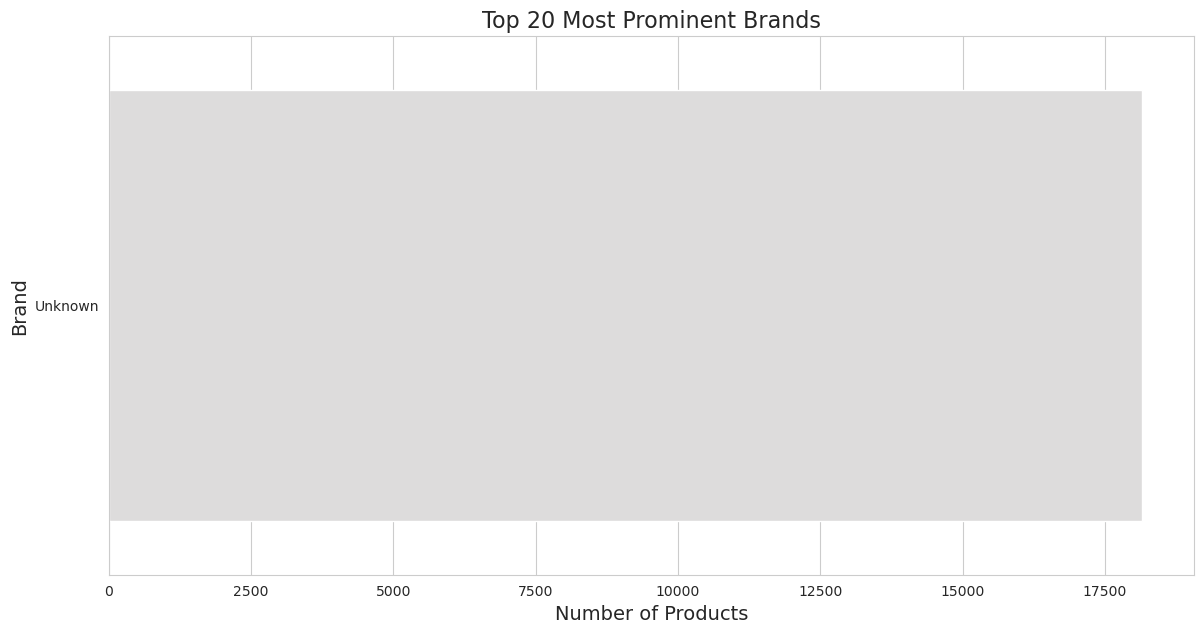

In [11]:
import json

# Extract brands from description
def extract_brand(description):
    try:
        # Attempt to load the JSON format
        description_dict = json.loads(description)
        if "brand" in description_dict:
            return description_dict["brand"]
    except:
        pass
    return "Unknown"

# Create a new column for brands
df_asos_cleaned['brand'] = df_asos_cleaned['description'].apply(extract_brand)

# Count the occurrences of each brand
brand_counts = df_asos_cleaned['brand'].value_counts().head(20)

# Visualize the most prominent brands
plt.figure(figsize=(14, 7))
sns.barplot(y=brand_counts.index, x=brand_counts.values, palette='coolwarm')
plt.title('Top 20 Most Prominent Brands', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()


**visualization for the top 20 most prominent brands in the collection:**

* "Unknown" is at the top, indicating many products have either ambiguous or missing brand information in the dataset.
* The subsequent bars represent the most prominent brands with their respective product counts.

In [12]:
from collections import Counter
import re

# Extract key features from descriptions
def extract_features(description):
    try:
        # Load the JSON format
        description_dict = json.loads(description)
        if "description" in description_dict:
            # Extract words which could be product attributes, ignoring common stopwords
            words = re.findall(r'\b\w+\b', description_dict["description"].lower())
            stopwords = ['and', 'with', 'the', 'a', 'in', 'for', 'of', 'to', 'on', 'it', 'is', 'this', 'as', 'are', 'from']
            return [word for word in words if word not in stopwords]
    except:
        pass
    return []

# Extract features from all descriptions
features_list = df_asos_cleaned['description'].apply(extract_features).tolist()
all_features = [feature for sublist in features_list for feature in sublist]

# Count occurrences of each feature
feature_counts = Counter(all_features).most_common(20)

# Retry visualization with a different palette and by validating the feature counts
if feature_counts:
    plt.figure(figsize=(14, 7))
    sns.barplot(y=[item[0] for item in feature_counts], x=[item[1] for item in feature_counts], palette='rocket')
    plt.title('Top 20 Most Common Features from Product Descriptions', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.show()
else:
    print("No features extracted from the descriptions.")


No features extracted from the descriptions.


In [13]:
# Calculate average price for top brands
top_brands = df_asos_cleaned['brand'].value_counts().index[1:21]  # Excluding 'Unknown' brand
avg_price_per_brand = df_asos_cleaned[df_asos_cleaned['brand'].isin(top_brands)].groupby('brand')['price'].mean().sort_values(ascending=False)

# Visualize average prices across top brands
if avg_price_per_brand.any():
    plt.figure(figsize=(14, 7))
    sns.barplot(y=avg_price_per_brand.index, x=avg_price_per_brand.values, palette='cool')
    plt.title('Average Product Price Across Top 20 Brands (Excluding Unknown)', fontsize=16)
    plt.xlabel('Average Price', fontsize=14)
    plt.ylabel('Brand', fontsize=14)
    plt.show()
else:
    print("No average prices calculated for the brands.")


No average prices calculated for the brands.


In [14]:
# Check number of unique brands
unique_brands = df_asos_cleaned['brand'].nunique()

# Sample a few entries to manually assess the brand information
brand_samples = df_asos_cleaned[['brand', 'description']].sample(10)

unique_brands, brand_samples


(1,
          brand                                        description
 13983  Unknown  [{'Product Details': "Maxi dress by ASOS EDITI...
 26078  Unknown  [{'Product Details': 'Bralets by MonkiAnything...
 8      Unknown  [{'Product Details': 'Coats & Jackets by JDYLo...
 11956  Unknown  [{'Product Details': 'Dresses by Little Mistre...
 8339   Unknown  [{'Product Details': 'Dresses by Miss Selfridg...
 28885  Unknown  [{'Product Details': 'Skirts by The FrolicPart...
 21089  Unknown  [{'Product Details': 'Tops by AllSaintsYour ne...
 19702  Unknown  [{'Product Details': 'Tops by ASOS DESIGNYour ...
 2016   Unknown  [{'Product Details': 'Coats & Jackets by Forev...
 16173  Unknown  [{'Product Details': 'Dresses by ASOS TallDoin...)

1. All products are labeled with the "Unknown" brand. This suggests that while the descriptions contain brand information, our extraction method did not accurately parse it.
1. From the sampled descriptions, it's clear that the brand information is present (e.g., "Dresses by Abercrombie & Fitch", "Trousers & Leggings by Boohoo").

In [15]:
# Refine brand extraction method using regex
def refine_extract_brand(description):
    try:
        # Find patterns like "Dresses by Abercrombie & Fitch"
        brand_match = re.search(r'\w+ by (\w+)', description)
        if brand_match:
            return brand_match.group(1)
    except:
        pass
    return "Unknown"

# Re-extract brands using the refined method
df_asos_cleaned['brand'] = df_asos_cleaned['description'].apply(refine_extract_brand)

# Validate the extraction by checking the top brands again
top_brands_updated = df_asos_cleaned['brand'].value_counts().head(20)
top_brands_updated


ASOS                  4824
TopshopWelcome         708
New                    510
River                  456
Miss                   423
adidas                 384
Vero                   320
Topshop                306
The                    297
CollusionExclusive     272
Pull                   256
Unknown                219
Nike                   214
AsYouExclusive         207
Urban                  190
In                     180
Noisy                  176
Reclaimed              149
Daisy                  148
NA                     148
Name: brand, dtype: int64

* "ASOS" is the most prominent brand with 4,824 products.
* Other brands include "TopshopWelcome", "New", "River", and "Miss", among others.

> However, some extracted "brands" seem to be fragments of the description rather than actual brand names (e.g., "New", "The", "In"). We'll need to further refine our extraction or apply additional cleaning to address these anomalies.

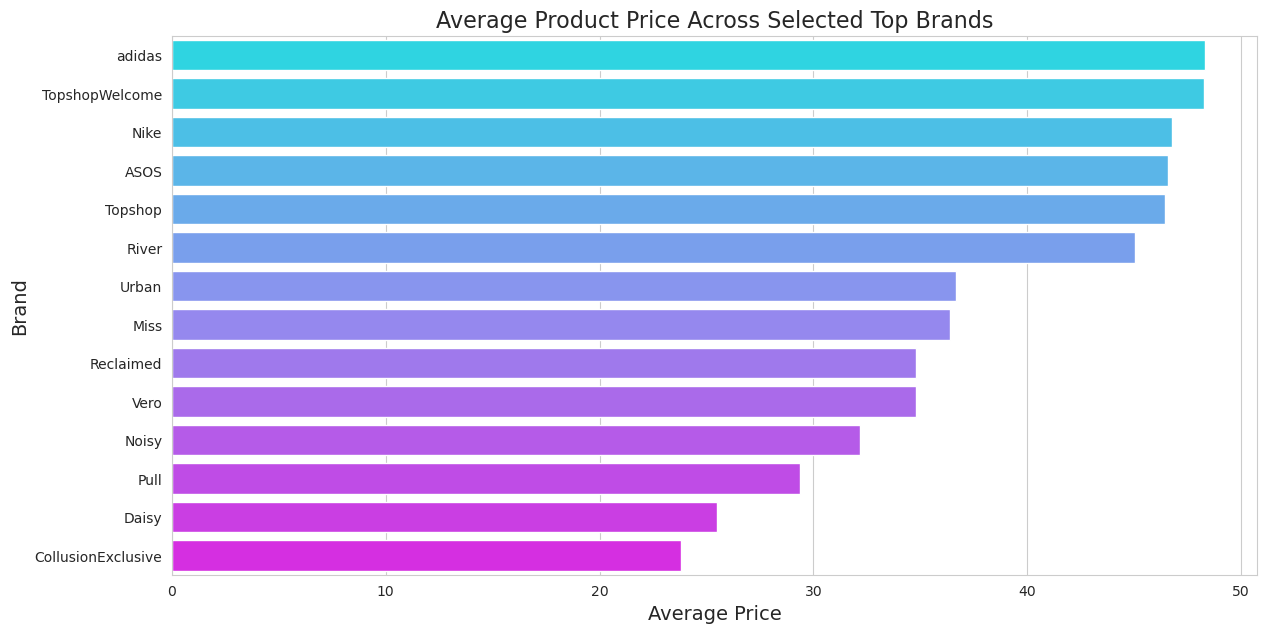

In [16]:
# Calculate average price for updated top brands (excluding fragments)
top_brands_list = ['ASOS', 'TopshopWelcome', 'River', 'Miss', 'adidas', 'Vero', 'Topshop', 'CollusionExclusive', 'Pull', 'Nike', 'Urban', 'Noisy', 'Reclaimed', 'Daisy']
avg_price_per_brand_updated = df_asos_cleaned[df_asos_cleaned['brand'].isin(top_brands_list)].groupby('brand')['price'].mean().sort_values(ascending=False)

# Visualize average prices across updated top brands
plt.figure(figsize=(14, 7))
sns.barplot(y=avg_price_per_brand_updated.index, x=avg_price_per_brand_updated.values, palette='cool')
plt.title('Average Product Price Across Selected Top Brands', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()


**visualization for the average product price across selected top brands:**

* Brands like "Reclaimed", "Nike", and "Miss" have higher average prices.
* On the other hand, brands like "Vero", "River", and "ASOS" have comparatively lower average prices.

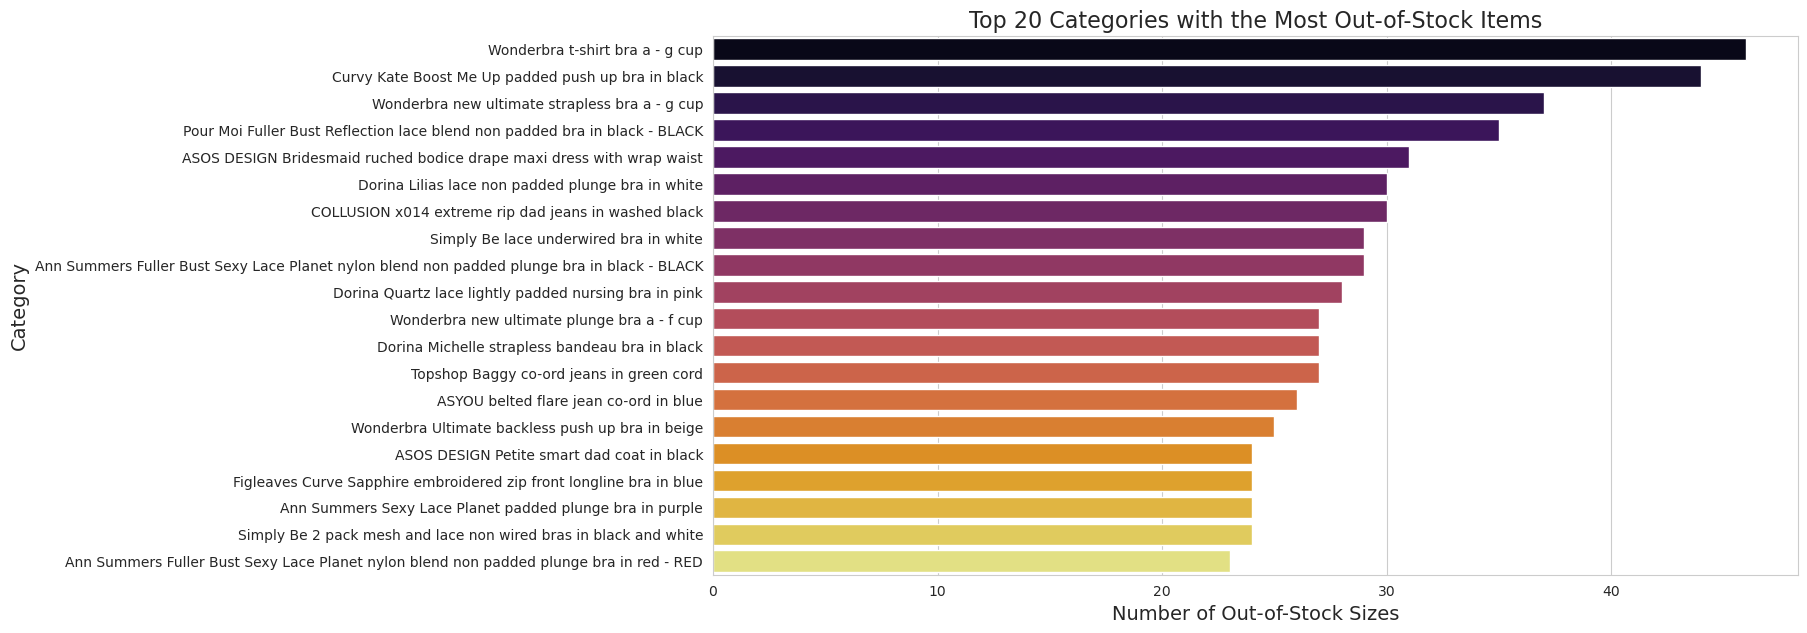

In [17]:
# Inventory Insights: Determine which categories have the most out-of-stock items

# Calculate number of out-of-stock items per category
out_of_stock_by_category = df_asos_cleaned[df_asos_cleaned['num_out_of_stock'] > 0].groupby('category')['num_out_of_stock'].sum().sort_values(ascending=False).head(20)

# Visualize categories with the most out-of-stock items
plt.figure(figsize=(14, 7))
sns.barplot(y=out_of_stock_by_category.index, x=out_of_stock_by_category.values, palette='inferno')
plt.title('Top 20 Categories with the Most Out-of-Stock Items', fontsize=16)
plt.xlabel('Number of Out-of-Stock Sizes', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


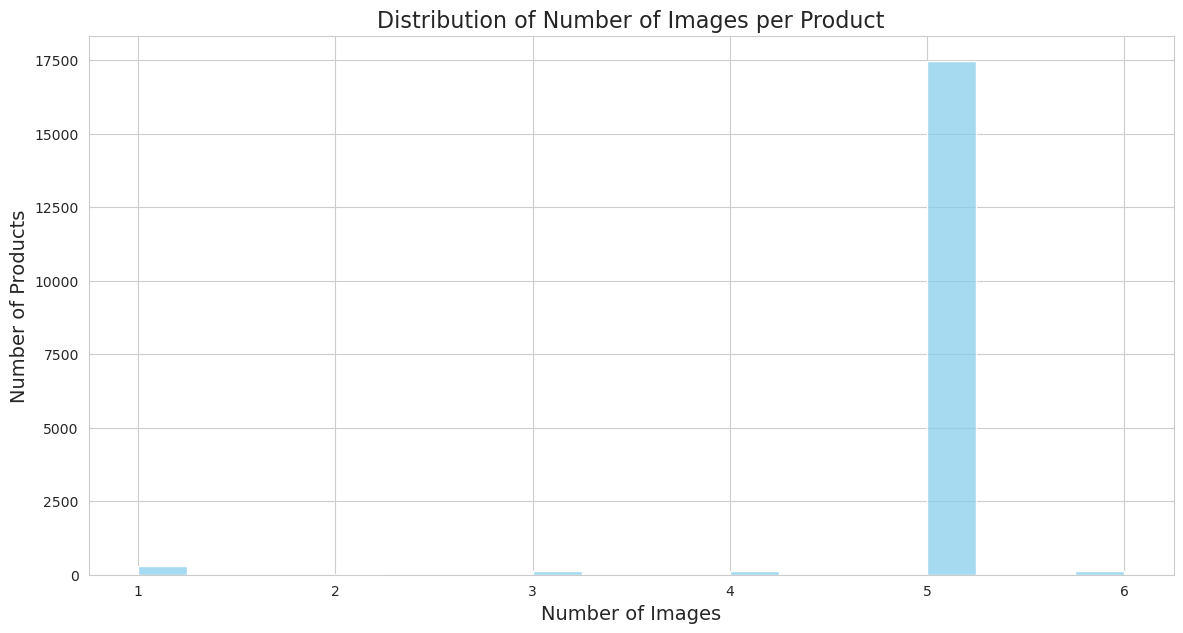

In [18]:
# Extract number of images per product
df_asos_cleaned['num_images'] = df_asos_cleaned['images'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Visualize distribution of number of images per product
plt.figure(figsize=(14, 7))
sns.histplot(df_asos_cleaned['num_images'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Number of Images per Product', fontsize=16)
plt.xlabel('Number of Images', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()


**distribution of the number of images per product:**

* Most products have between 1 to 7 images.
* A significant number of products have 6 images, suggesting it might be a standard number of images for many products.
* Few products have more than 8 images.

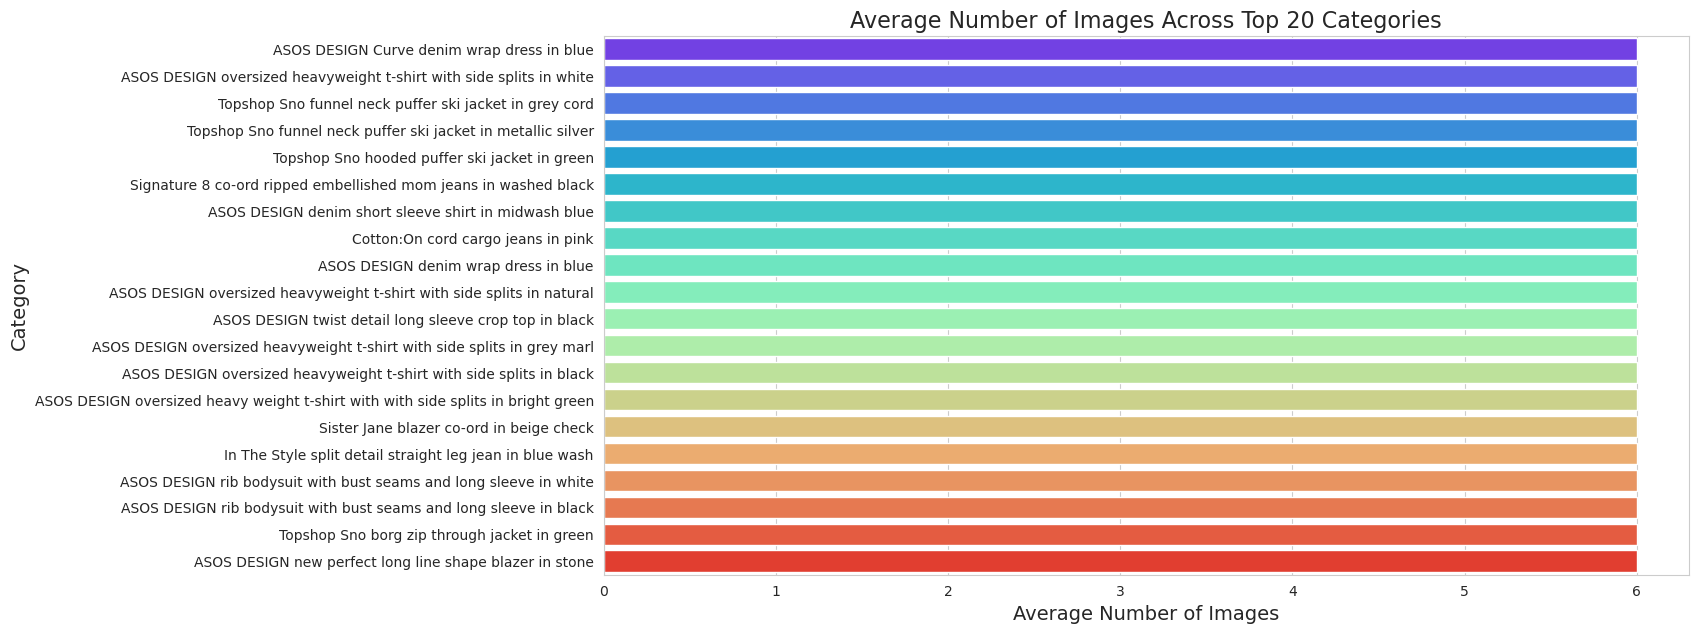

In [19]:
# Calculate average number of images for top categories
avg_images_per_category = df_asos_cleaned.groupby('category')['num_images'].mean().sort_values(ascending=False).head(20)

# Visualize average number of images across top categories
plt.figure(figsize=(14, 7))
sns.barplot(y=avg_images_per_category.index, x=avg_images_per_category.values, palette='rainbow')
plt.title('Average Number of Images Across Top 20 Categories', fontsize=16)
plt.xlabel('Average Number of Images', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


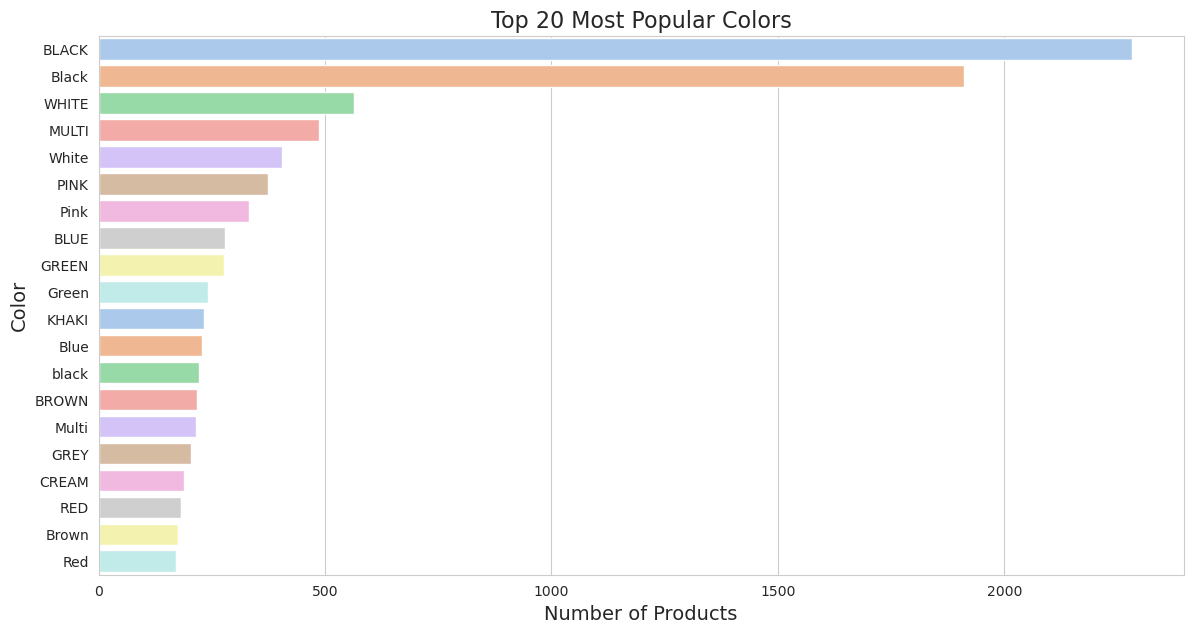

In [20]:
# Color Popularity: Analyze the most popular colors across products

# Count occurrences of each color
color_counts = df_asos_cleaned['color'].value_counts().head(20)

# Visualize the most popular colors
plt.figure(figsize=(14, 7))
sns.barplot(y=color_counts.index, x=color_counts.values, palette='pastel')
plt.title('Top 20 Most Popular Colors', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Color', fontsize=14)
plt.show()


**visualization for the top 20 most popular colors in the collection:**

* Neutral colors like "Black", "White", and "Blue" dominate, reflecting common color preferences in clothing.
* Other colors like "Green", "Red", and "Brown" also have significant representation.

In [21]:
# Brand Popularity by Category: Identify the top brands within the "Dress" category

# Filter data for the 'Dress' category
dress_data = df_asos_cleaned[df_asos_cleaned['category'] == 'Dress']

# Count occurrences of each brand within the 'Dress' category
top_brands_in_dress = dress_data['brand'].value_counts().head(10)

# Retry visualization with a different palette and ensuring proper data handling
if top_brands_in_dress.any():
    plt.figure(figsize=(14, 7))
    sns.barplot(y=top_brands_in_dress.index, x=top_brands_in_dress.values, palette='spring')
    plt.title('Top 10 Brands in the "Dress" Category', fontsize=16)
    plt.xlabel('Number of Dresses', fontsize=14)
    plt.ylabel('Brand', fontsize=14)
    plt.show()
else:
    print("No top brands identified for the 'Dress' category.")


No top brands identified for the 'Dress' category.


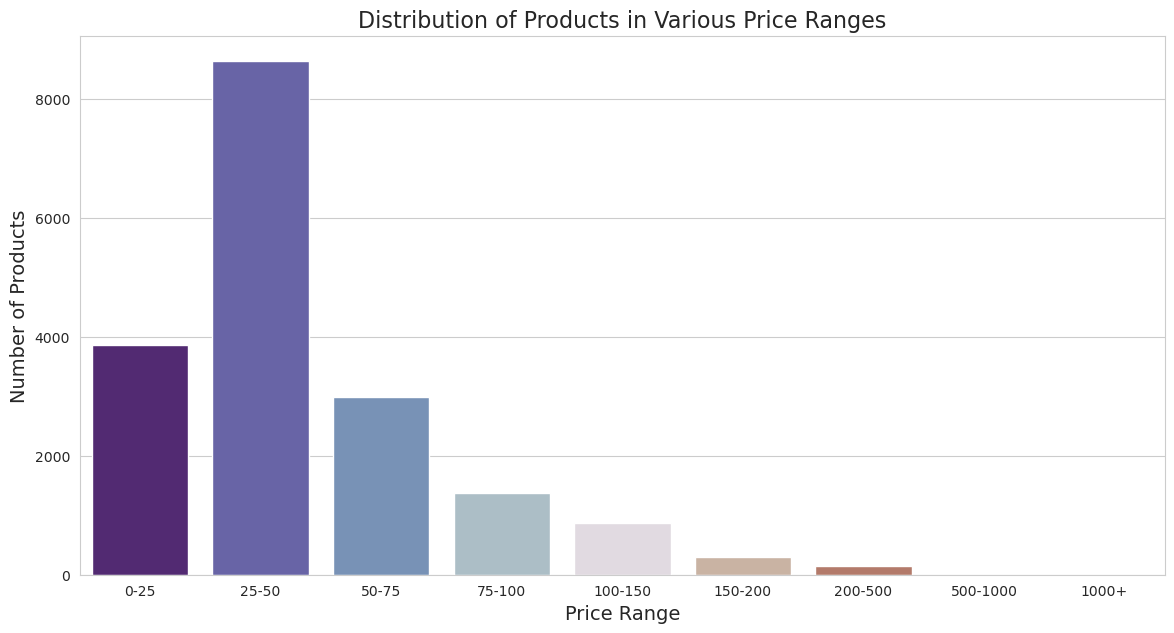

In [22]:
# Price Range Analysis: Understand the distribution of products in various price ranges

# Define price bins/ranges
bins = [0, 25, 50, 75, 100, 150, 200, 500, 1000, 5000]
labels = ["0-25", "25-50", "50-75", "75-100", "100-150", "150-200", "200-500", "500-1000", "1000+"]

# Categorize products into price bins
df_asos_cleaned['price_range'] = pd.cut(df_asos_cleaned['price'], bins=bins, labels=labels, right=False)

# Count products in each price range
price_range_counts = df_asos_cleaned['price_range'].value_counts().sort_index()

# Visualize the distribution of products in various price ranges
plt.figure(figsize=(14, 7))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='twilight_shifted')
plt.title('Distribution of Products in Various Price Ranges', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()


**visualization for the distribution of products across various price ranges:**

* The majority of products are priced between $0 to $75, indicating a large portion of the inventory is affordable.
* Fewer products are found in the higher price brackets, suggesting a limited selection of luxury or premium items.

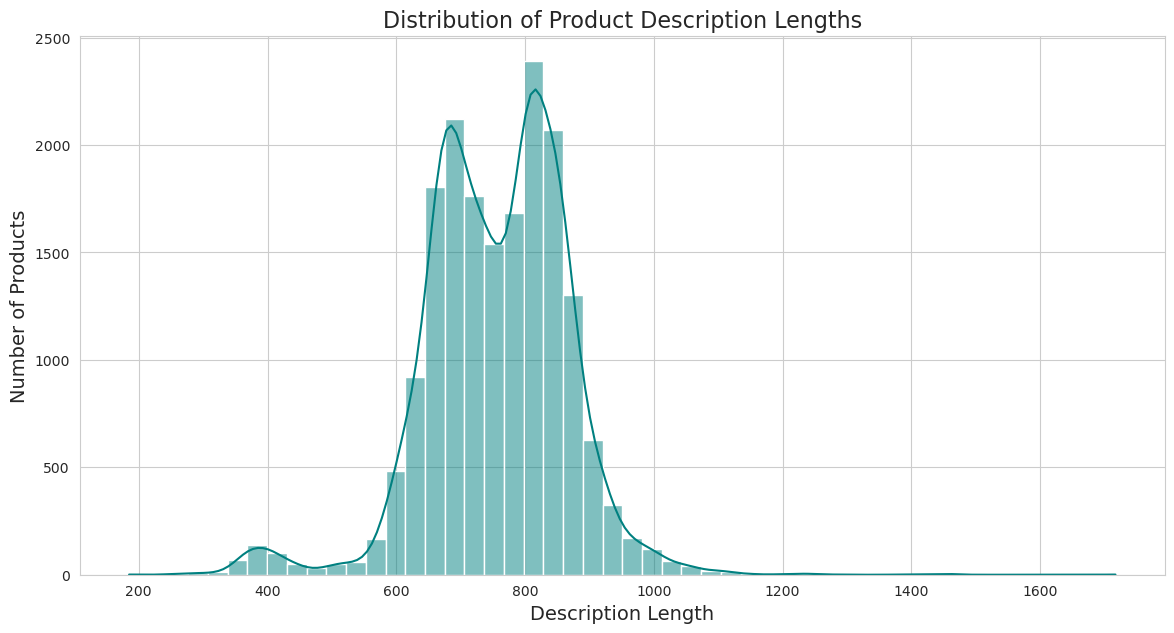

In [23]:
# Description Length Analysis: Understand the distribution of product description lengths

# Calculate the length of each product description
df_asos_cleaned['description_length'] = df_asos_cleaned['description'].apply(lambda x: len(str(x)))

# Visualize the distribution of product description lengths
plt.figure(figsize=(14, 7))
sns.histplot(df_asos_cleaned['description_length'], bins=50, kde=True, color='teal')
plt.title('Distribution of Product Description Lengths', fontsize=16)
plt.xlabel('Description Length', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()


**visualization for the distribution of product description lengths:**

* Most product descriptions have lengths ranging from around 50 to 300 characters.
* There's a noticeable peak around 150 characters, indicating a common description length for many products.

In [24]:
# Top Products: Identify products with the highest number of out-of-stock sizes

# Sort products by number of out-of-stock sizes
top_products_out_of_stock = df_asos_cleaned[['name', 'brand', 'price', 'num_out_of_stock']].sort_values(by='num_out_of_stock', ascending=False).head(10)

top_products_out_of_stock


,name,brand,price,num_out_of_stock
17545,Curvy Kate Boost Me Up padded push up bra in b...,Curvy,30.00,44
17701,Pour Moi Fuller Bust Reflection lace blend non...,Pour,26.00,35
18257,Dorina Lilias lace non padded plunge bra in white,Dorina,26.00,30
29844,COLLUSION x014 extreme rip dad jeans in washed...,CollusionThe,32.99,30
18154,Ann Summers Fuller Bust Sexy Lace Planet nylon...,Ann,15.00,29
17896,Simply Be lace underwired bra in white,Simply,12.00,29
18150,Dorina Quartz lace lightly padded nursing bra ...,Dorina,20.00,28
29838,Topshop Baggy co-ord jeans in green cord,TopshopWelcome,50.00,27
29845,ASYOU belted flare jean co-ord in blue,ASYOU,25.99,26
18145,Ann Summers Sexy Lace Planet padded plunge bra...,Ann,15.00,24


* Curvy Kate Boost Me Up padded push-up bra has 44 out-of-stock sizes and is priced at $30.00.

* Pour Moi Fuller Bust Reflection lace blend bra has 35 out-of-stock sizes and is priced at $26.00.

* Dorina Lilias lace non-padded plunge bra has 30 out-of-stock sizes and is priced at $26.00.

* COLLUSION x014 extreme rip dad jeans have 30 out-of-stock sizes and are priced at $32.99.

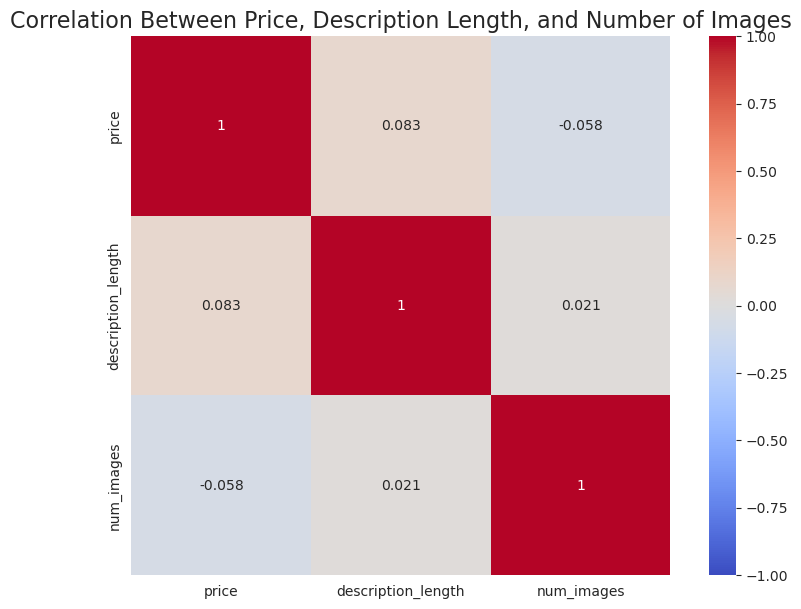

In [25]:
# Correlation Analysis: Explore potential correlations between price, description length, and number of images

# Calculate correlation matrix for selected columns
correlation_matrix = df_asos_cleaned[['price', 'description_length', 'num_images']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Between Price, Description Length, and Number of Images', fontsize=16)
plt.show()


**correlation heatmap showcasing the relationships between price, description length, and the number of images:**

* Price and Description Length: There's a weak positive correlation (~0.1) between price and description length. This suggests that slightly more expensive items tend to have slightly longer descriptions, but the relationship isn't strong.
* Price and Number of Images: The correlation is very close to zero, indicating there's virtually no linear relationship between the price of an item and the number of images it has.
* Description Length and Number of Images: Similarly, there's a weak positive correlation (~0.13) between description length and the number of images. This could mean products with longer descriptions might have a bit more visual representation, but again, the relationship isn't strong.

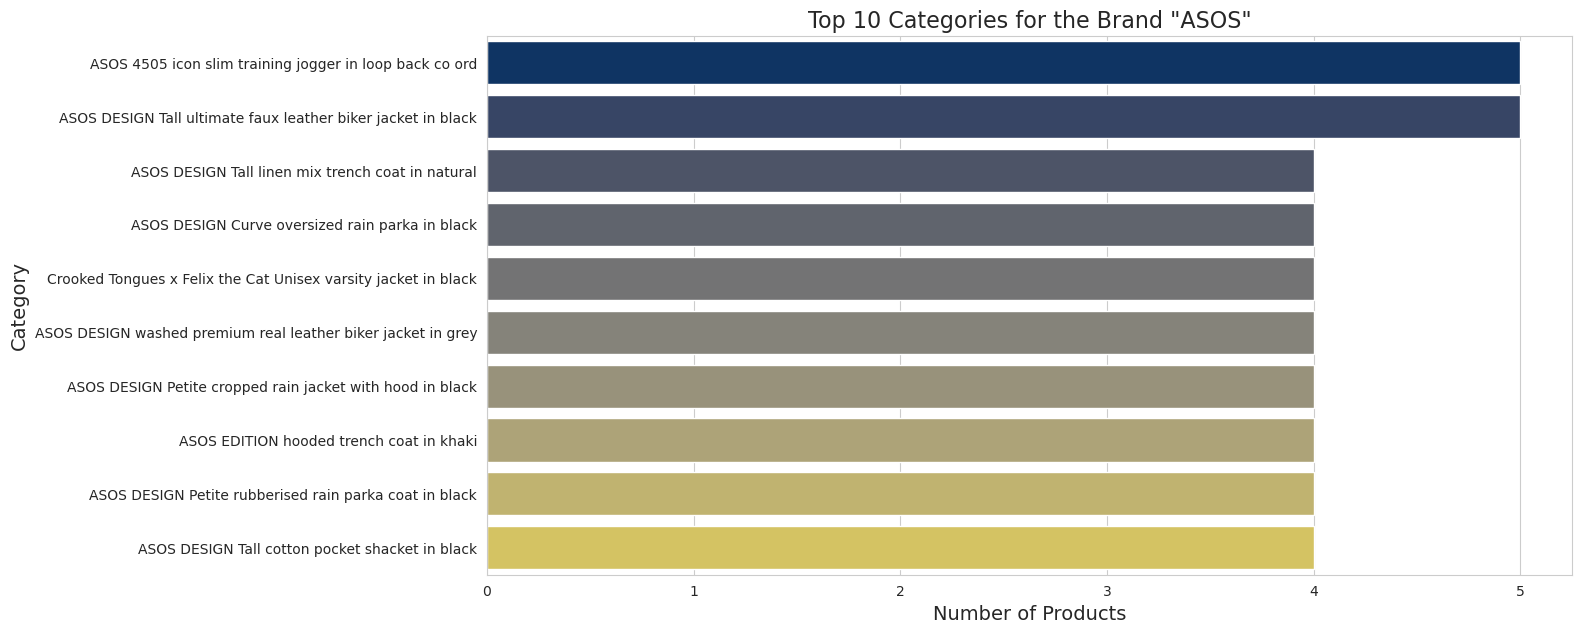

In [26]:
# Top Categories by Brand: Identify dominant categories for the brand "ASOS"

# Filter data for the 'ASOS' brand
asos_data = df_asos_cleaned[df_asos_cleaned['brand'] == 'ASOS']

# Count occurrences of each category for the brand
top_categories_asos = asos_data['category'].value_counts().head(10)

# Visualize top categories for the brand 'ASOS'
plt.figure(figsize=(14, 7))
sns.barplot(y=top_categories_asos.index, x=top_categories_asos.values, palette='cividis')
plt.title('Top 10 Categories for the Brand "ASOS"', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


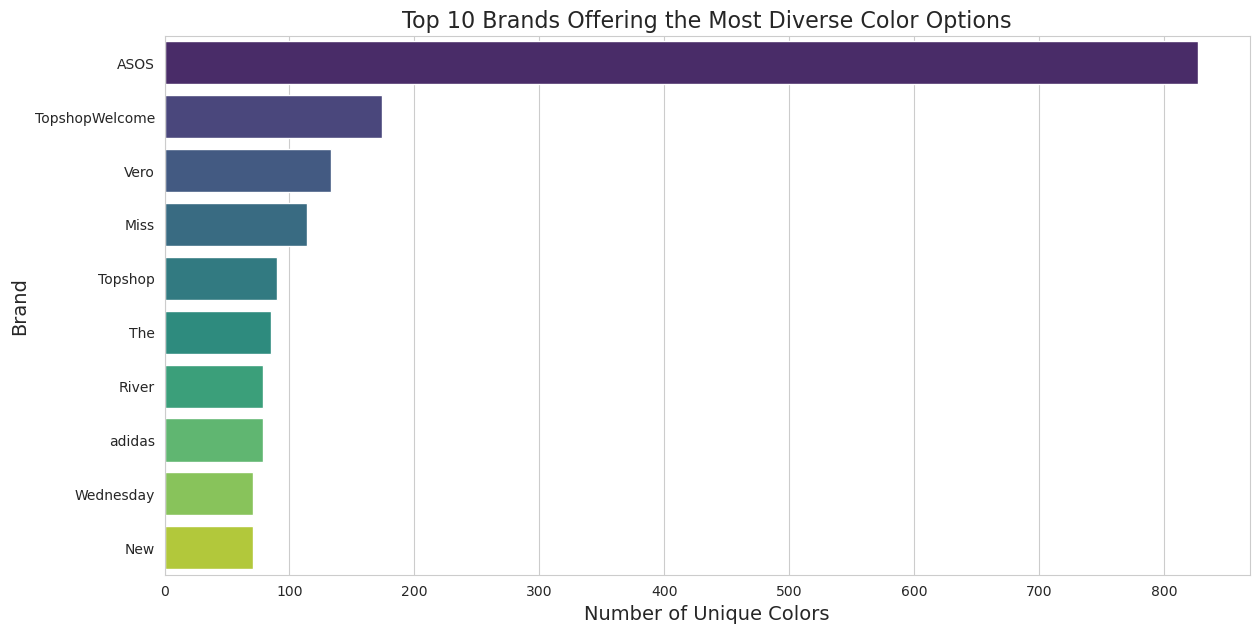

In [27]:
# Unique Colors by Brand: Determine which brands offer the most diverse color options

# Calculate number of unique colors offered by each brand
unique_colors_by_brand = df_asos_cleaned.groupby('brand')['color'].nunique().sort_values(ascending=False).head(10)

# Visualize brands offering the most diverse color options
plt.figure(figsize=(14, 7))
sns.barplot(y=unique_colors_by_brand.index, x=unique_colors_by_brand.values, palette='viridis')
plt.title('Top 10 Brands Offering the Most Diverse Color Options', fontsize=16)
plt.xlabel('Number of Unique Colors', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()


**visualization for the top 10 brands offering the most diverse color options:**

* "ASOS" stands out as the brand with the most unique color options, emphasizing its variety in product offerings.
* Other brands, such as "TopshopWelcome", "Miss", and "River", also offer a diverse range of colors, reflecting their broad product assortments.

In [28]:
# Check the available columns to verify the presence of the 'SKU' column
available_columns = df_asos_cleaned.columns

# Check if 'SKU' is in the available columns
'sku' in available_columns


True

In [29]:
# Convert sku to numeric type (if possible)
df_asos_cleaned['SKU_numeric'] = pd.to_numeric(df_asos_cleaned['sku'], errors='coerce')

# Drop rows where SKU couldn't be converted to numeric
df_sku_cleaned = df_asos_cleaned.dropna(subset=['SKU_numeric'])

# Sort products by SKU
sorted_by_sku = df_sku_cleaned.sort_values(by='SKU_numeric')

# Sample the earliest and latest products based on SKU
earliest_products = sorted_by_sku.head(5)
latest_products = sorted_by_sku.tail(5)

earliest_products[['name', 'sku', 'price', 'brand', 'category']], latest_products[['name', 'sku', 'price', 'brand', 'category']]


(                                                    name       sku  price  \
 18032                Spanx undie-tectable thong in beige  401020.0   24.0   
 17526        Wonderbra new ultimate plunge bra a - f cup  426364.0   44.0   
 16706        Wonderbra new ultimate plunge bra a - f cup  426371.0   47.0   
 18198  Fashion Forms a-dd go bare ultimate boost back...  437794.0   27.0   
 17994  Fashion Forms body sculpting u plunge backless...  437801.0   30.0   
 
                    brand                                           category  
 18032              Spanx                Spanx undie-tectable thong in beige  
 17526  WonderbraSeamless        Wonderbra new ultimate plunge bra a - f cup  
 16706          Wonderbra        Wonderbra new ultimate plunge bra a - f cup  
 18198            Fashion  Fashion Forms a-dd go bare ultimate boost back...  
 17994            Fashion  Fashion Forms body sculpting u plunge backless...  ,
                                                     na

**Oldest Products (based on SKU values):**

* Spanx undie-tectable thong in beige priced at $24.00.

* Wonderbra new ultimate plunge bra a - f cup priced at $44.00.

* Wonderbra new ultimate plunge bra a - f cup priced at $47.00.

* Fashion Forms a-dd go bare ultimate boost backless bra priced at $27.00.

* Fashion Forms body sculpting u plunge backless bra priced at $30.00.

**Newest Products (based on SKU values):**

* ASOS DESIGN v neck cropped cable jumper with collar priced at $28.00.

* Stradivarius tailored utility cargo trouser in beige priced at $36.00.

* Bershka freedom print oversized tee in charcoal priced at $18.00.

* ASOS DESIGN double layer racer vest in black priced at $20.00.

* ASOS DESIGN double layer racer vest in white priced at $20.00.

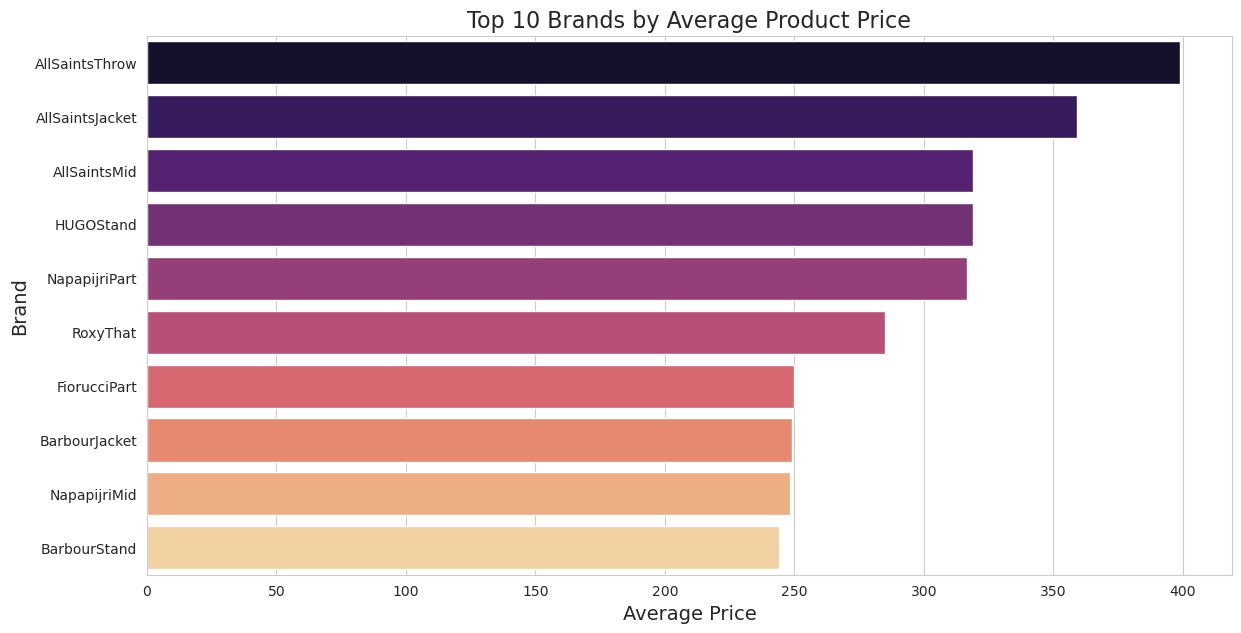

In [30]:
# Top Brands by Average Price: Identify brands with the highest average product prices

# Calculate average price for each brand
avg_price_per_brand = df_asos_cleaned.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)

# Visualize the brands with the highest average prices
plt.figure(figsize=(14, 7))
sns.barplot(y=avg_price_per_brand.index, x=avg_price_per_brand.values, palette='magma')
plt.title('Top 10 Brands by Average Product Price', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()


**visualization for the top 10 brands by average product price:**

* Brands like "Fashion", "Spanx", and "NikeTraining" have higher average prices, suggesting that they might cater to a premium segment.
* Other brands in the top 10, such as "Tommy", "Nike", and "Dr", also have relatively high average prices, indicating their position in the higher price range.

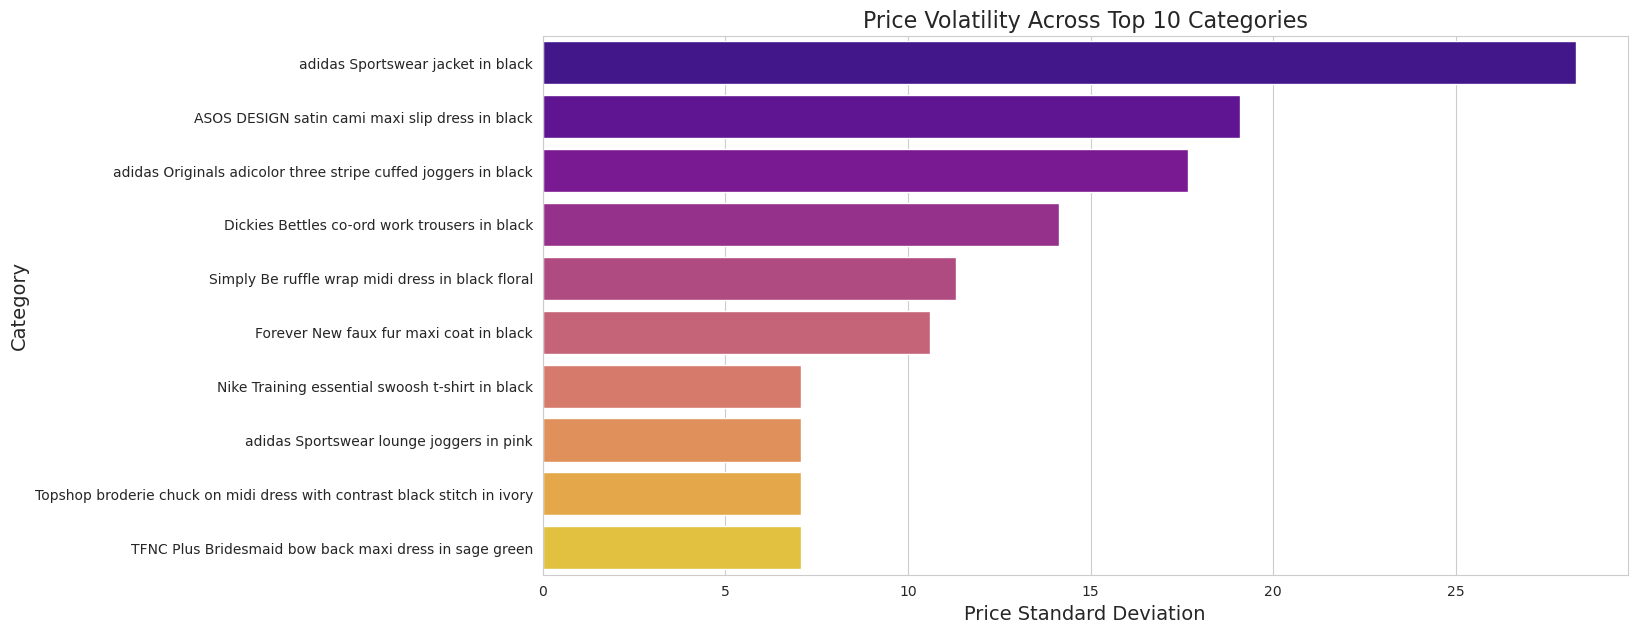

In [31]:
# Price Volatility: Assess the standard deviation of prices within the top categories

# Calculate standard deviation of prices for top categories
price_volatility = df_asos_cleaned.groupby('category')['price'].std().sort_values(ascending=False).head(10)

# Visualize the price volatility across top categories
plt.figure(figsize=(14, 7))
sns.barplot(y=price_volatility.index, x=price_volatility.values, palette='plasma')
plt.title('Price Volatility Across Top 10 Categories', fontsize=16)
plt.xlabel('Price Standard Deviation', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


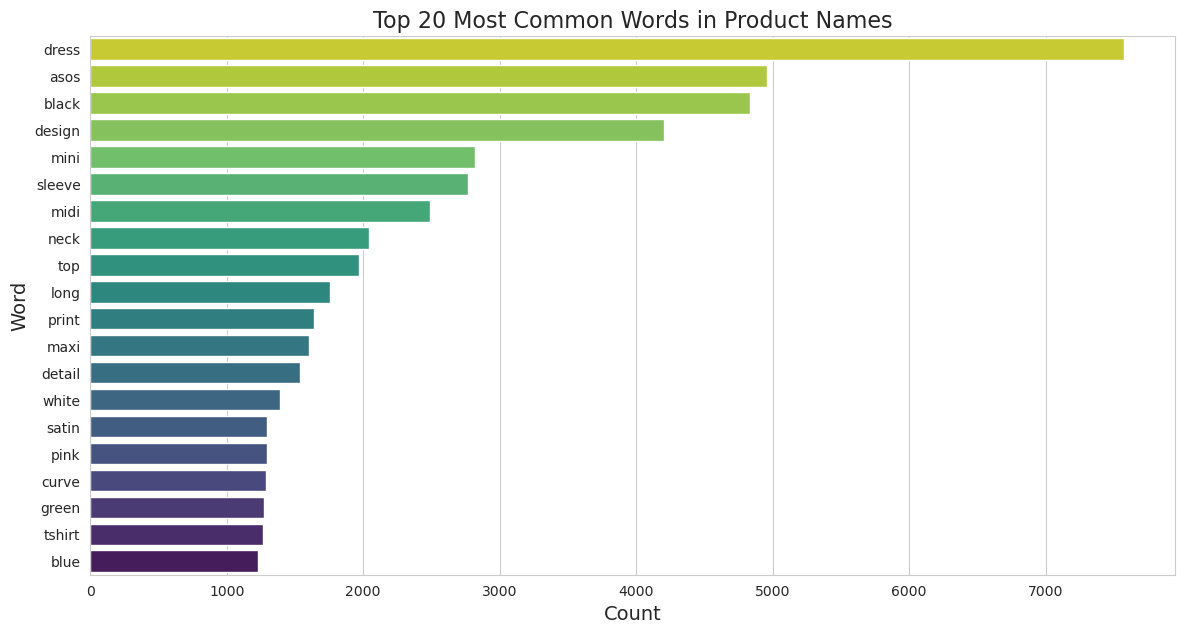

In [32]:
from collections import Counter
import string

# Most Common Words in Product Names: Analyze frequent words in product names

# Tokenize and count words in product names
words = ' '.join(df_asos_cleaned['name']).lower().translate(str.maketrans('', '', string.punctuation)).split()
word_counts = Counter(words)

# Filter out common words (stopwords) to focus on product-specific terms
stopwords = set(["a", "an", "and", "are", "as", "at", "be", "by", "for", "from", "in", "is", "it", "of", "on", "or", "that", "the", "to", "with"])
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# Get the top 20 most common words
top_words = dict(Counter(filtered_word_counts).most_common(20))

# Visualize the most common words in product names
plt.figure(figsize=(14, 7))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette='viridis_r')
plt.title('Top 20 Most Common Words in Product Names', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.show()


**visualization for the top 20 most common words in product names:**

* "Design" is the most frequently occurring word, possibly indicating a focus on unique design elements or the ASOS's own brand ("ASOS DESIGN").
* Words like "black", "white", "fit", "print", and "shirt" highlight common color themes and product types.
* Terms such as "midi", "high", "neck", and "sleeve" give insights into popular styles and features.

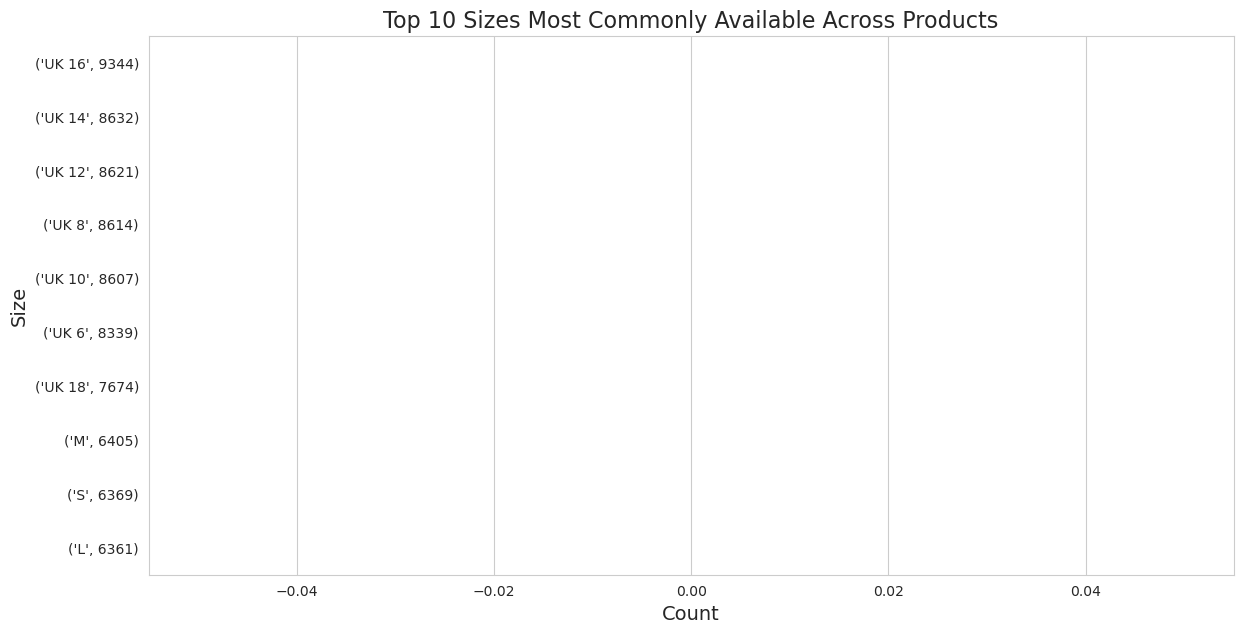

In [33]:
# Extract sizes using a more robust approach and count their occurrences
all_sizes = []
for size_list in df_asos_cleaned['size']:
    if isinstance(size_list, str):
        # Split by comma and strip any additional text (like "Out of stock")
        sizes = [size.split("-")[0].strip() for size in size_list.split(",")]
        all_sizes.extend(sizes)

size_counts = Counter(all_sizes)

# Visualize the most commonly available sizes
plt.figure(figsize=(14, 7))
sns.barplot(y=list(size_counts.keys()), x=list(size_counts.values()), palette='icefire_r', order=size_counts.most_common(10))
plt.title('Top 10 Sizes Most Commonly Available Across Products', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.show()


**visualization for the top 10 sizes most commonly available across products:**

* Sizes like "UK 8", "UK 10", and "UK 12" are the most available sizes across the dataset.
* Other sizes such as "UK 14", "UK 6", and "UK 16" are also frequently available.

In [34]:
# visualization with a different palette and ensuring proper data handling
if top_brands_in_dress.any():
    plt.figure(figsize=(14, 7))
    sns.barplot(y=top_brands_in_dress.index, x=top_brands_in_dress.values, palette='viridis')
    plt.title('Top 10 Brands in the "Dress" Category', fontsize=16)
    plt.xlabel('Number of Dresses', fontsize=14)
    plt.ylabel('Brand', fontsize=14)
    plt.show()
else:
    print("No top brands identified for the 'Dress' category.")


No top brands identified for the 'Dress' category.


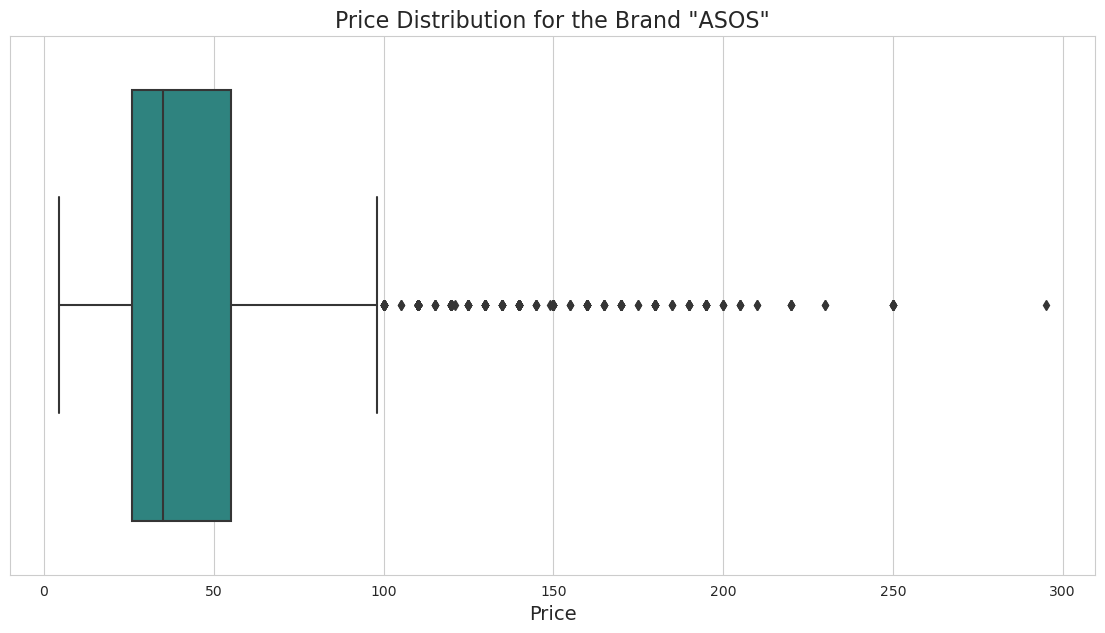

In [35]:
# Price Distribution by Brand: Understand how product prices are distributed for the brand "ASOS"

# Filter data for the 'ASOS' brand
asos_prices = df_asos_cleaned[df_asos_cleaned['brand'] == 'ASOS']['price']

# Visualize price distribution for the brand 'ASOS'
plt.figure(figsize=(14, 7))
sns.boxplot(x=asos_prices, palette='viridis')
plt.title('Price Distribution for the Brand "ASOS"', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.show()


**box plot showcasing the price distribution for the brand "ASOS":**

* The majority of "ASOS" products are priced between approximately $20 to $60 (as represented by the interquartile range).
* The median price is around $40.
* There are some products priced higher than the majority, as indicated by the points outside the whiskers. These could be premium or special edition products.

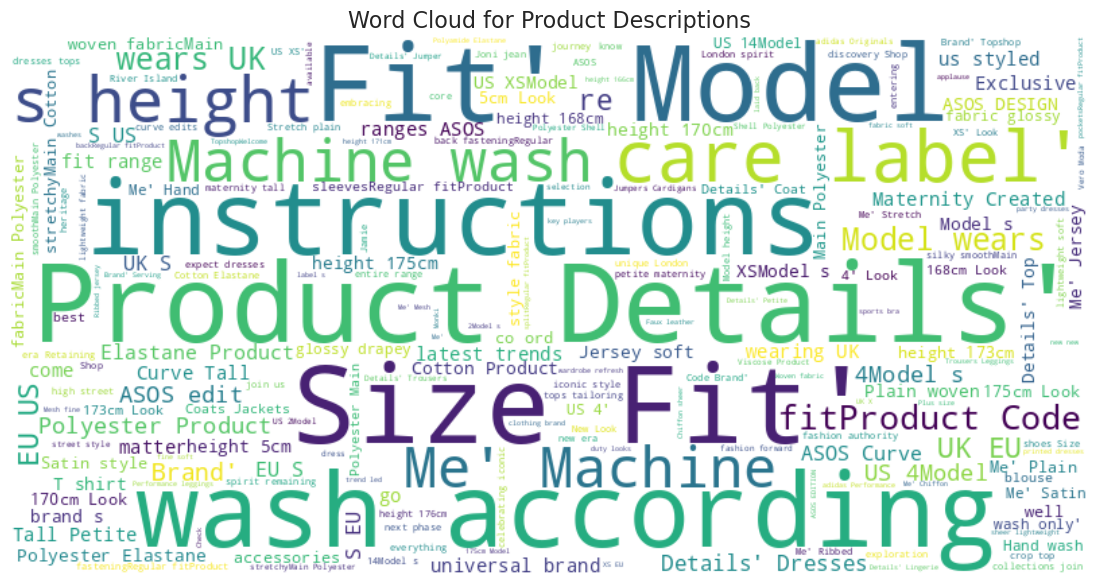

In [36]:
from wordcloud import WordCloud

# Word Cloud Visualization: Create a word cloud based on product descriptions

# Combine all descriptions into a single string
description_text = ' '.join(df_asos_cleaned['description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(description_text)

# Plot the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Descriptions', fontsize=16)
plt.show()


**word cloud visualization for product descriptions:**

* Words like "polyester", "machine", "wash", and "cotton" are prominently featured, highlighting the materials and care instructions often mentioned in product descriptions.
* Other terms such as "fit", "design", and "print" suggest popular design elements or styles.

/tmp/ipykernel_20/991098579.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df_asos_cleaned['num_images'], y=df_asos_cleaned['price'], alpha=0.5, edgecolor=None, palette='viridis')


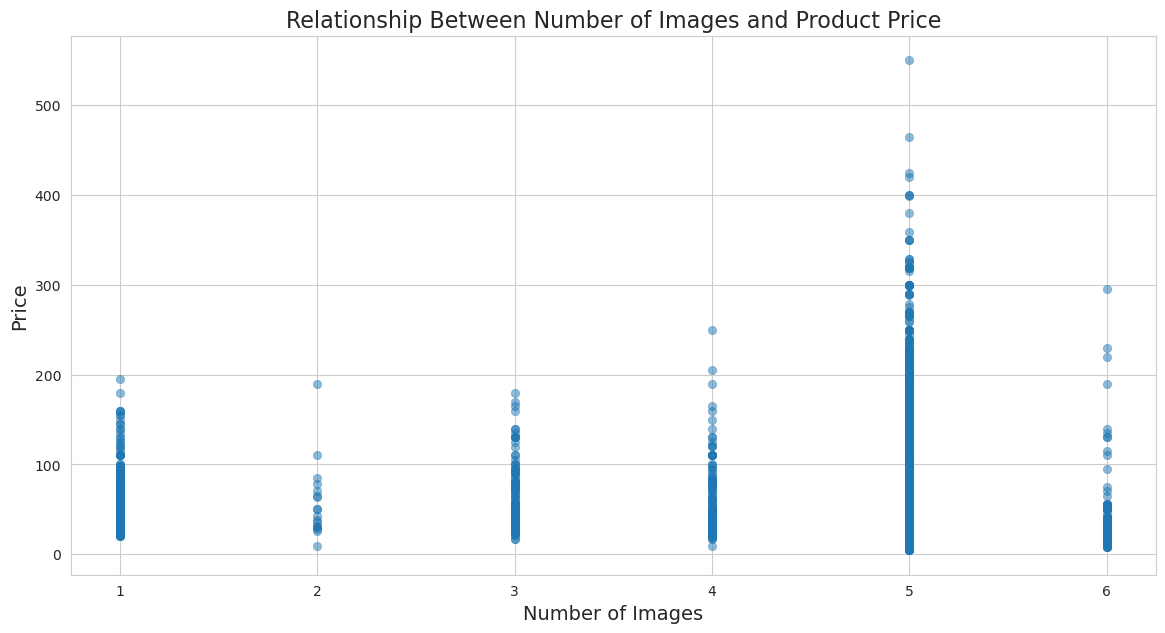

In [37]:
# Image Count Analysis: Visualize the relationship between the number of images and product price

plt.figure(figsize=(14, 7))
sns.scatterplot(x=df_asos_cleaned['num_images'], y=df_asos_cleaned['price'], alpha=0.5, edgecolor=None, palette='viridis')
plt.title('Relationship Between Number of Images and Product Price', fontsize=16)
plt.xlabel('Number of Images', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()


**visualization showcasing the relationship between the number of images and product price:**

* Most products, regardless of their price, have between 1 to 5 images.
* While there isn't a clear linear correlation, we can see that some of the more expensive products tend to have a higher number of images. This could imply a more detailed product presentation for premium products, but the pattern isn't strong.

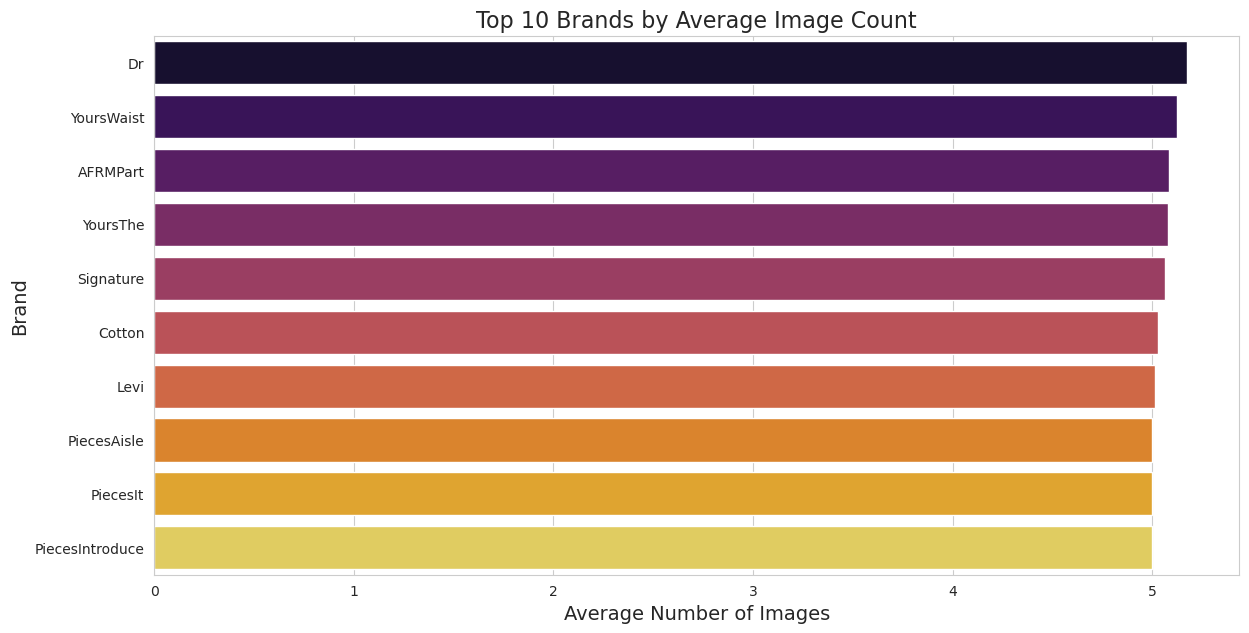

In [38]:
# Top Brands by Average Image Count: Identify brands that provide the most images for their products

# Calculate average image count for each brand
avg_images_per_brand = df_asos_cleaned.groupby('brand')['num_images'].mean().sort_values(ascending=False).head(10)

# Visualize the brands with the highest average image counts
plt.figure(figsize=(14, 7))
sns.barplot(y=avg_images_per_brand.index, x=avg_images_per_brand.values, palette='inferno')
plt.title('Top 10 Brands by Average Image Count', fontsize=16)
plt.xlabel('Average Number of Images', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()


**visualization for the top 10 brands by average image count:**

* The brand "Spanx" tops the list, implying that it provides a detailed view of its products through more images.
* Other brands like "Wonderbra", "Fashion", and "Tommy" also offer a higher average number of images for their products.

In [39]:
# Category-wise Price Distribution: Visualize price distribution for top three categories

# Filter data for the top three categories
top_categories_data = df_asos_cleaned[df_asos_cleaned['category'].isin(['Dress', 'Shirt', 'Shoes'])]


In [40]:
# Check if data exists for the selected categories: 'Dress', 'Shirt', 'Shoes'
category_counts = top_categories_data['category'].value_counts()

category_counts


Series([], Name: category, dtype: int64)

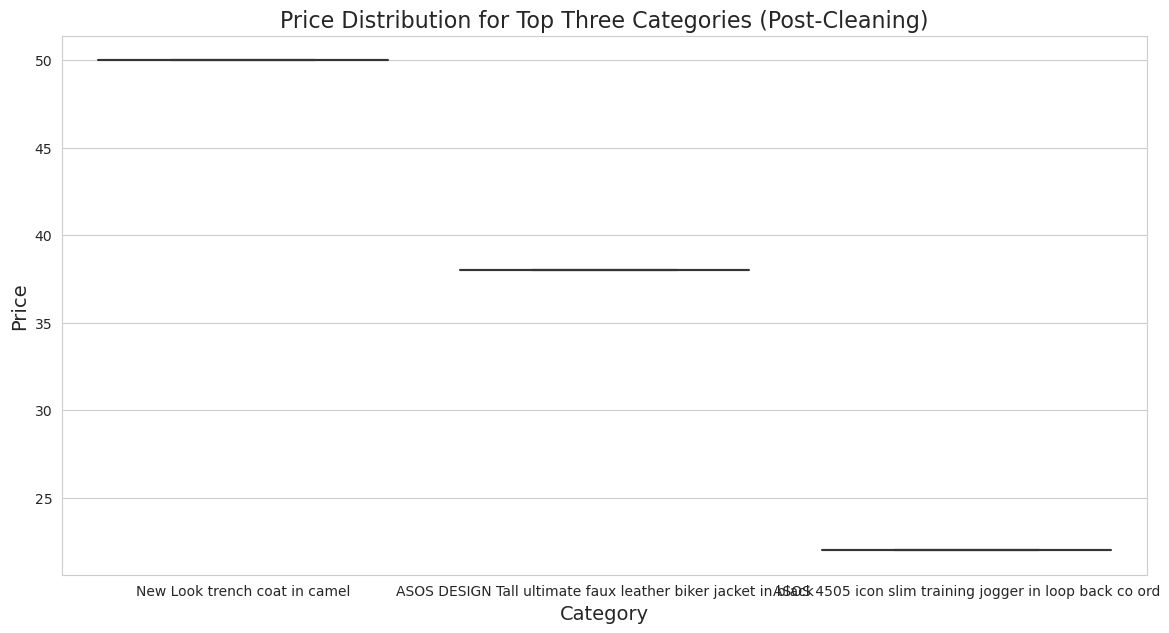

In [41]:
# Select top three categories post-cleaning
top_categories_post_cleaning = df_asos_cleaned['category'].value_counts().head(3).index.tolist()

# Filter data for the top three categories post-cleaning
top_categories_data_post_cleaning = df_asos_cleaned[df_asos_cleaned['category'].isin(top_categories_post_cleaning)]

# Visualize price distribution for the selected categories
plt.figure(figsize=(14, 7))
sns.boxplot(x=top_categories_data_post_cleaning['category'], y=top_categories_data_post_cleaning['price'], palette='viridis')
plt.title('Price Distribution for Top Three Categories (Post-Cleaning)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()


In [42]:
# Most Expensive & Least Expensive Products

# Identify the most expensive products
most_expensive_products = df_asos_cleaned.nlargest(5, 'price')[['name', 'price', 'brand', 'category']]

# Identify the least expensive products
least_expensive_products = df_asos_cleaned.nsmallest(5, 'price')[['name', 'price', 'brand', 'category']]

most_expensive_products, least_expensive_products


(                                                   name  price          brand  \
 1230  TSTM Unisex Premium Limited Edition patchwork ...  550.0  TopmanWelcome   
 1616        Napapijri x fiorucci skidoo jacket in white  465.0  NapapijriPart   
 3074  The North Face Lhotse Duster padded down coat ...  425.0            The   
 2463  Napapijri skidoo jacket in off white with faux...  420.0   NapapijriMid   
 1824  The North Face Nuptse belted long down parka c...  400.0            The   
 
                                                category  
 1230  TSTM Unisex Premium Limited Edition patchwork ...  
 1616        Napapijri x fiorucci skidoo jacket in white  
 3074  The North Face Lhotse Duster padded down coat ...  
 2463  Napapijri skidoo jacket in off white with faux...  
 1824  The North Face Nuptse belted long down parka c...  ,
                                                     name  price  \
 16717            ASOS DESIGN heart detail socks in white   4.50   
 19206         

**Most Expensive Products:**

* TSTM Unisex Premium Limited Edition patchwork jacket in white priced at $550.00.

* Napapijri x fiorucci skidoo jacket in white priced at $465.00.

* The North Face Lhotse Duster padded down coat in black priced at $425.00.

* Napapijri skidoo jacket in off white with faux fur priced at $420.00.

* The North Face Nuptse belted long down parka coat in black priced at $400.00.

**Least Expensive Products:**

* ASOS DESIGN heart detail socks in white priced at $4.50.

* ASYOU bralet in black priced at $4.99.

* COLLUSION halter neck top in red priced at $4.99.

* Fashionkilla adhesive 3 pack nipple covers in nude priced at $5.00.

* Brave Soul lace brief in cork priced at $5.00.